In [1]:
import pyucalgarysrs
import datetime

In [2]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2021, 11, 4, 6, 30, 0)
end_dt = datetime.datetime(2021, 11, 4, 6, 35, 59)

In [3]:
res = srs.data.download("TREX_BLUE_RAW", start_dt, end_dt, site_uid="gill")

In [4]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [5]:
data.data

array([[[673, 650, 622, ..., 649, 593, 822],
        [428, 572, 597, ..., 571, 421, 572],
        [437, 548, 521, ..., 639, 640, 564],
        ...,
        [642, 597, 599, ..., 560, 625, 524],
        [663, 622, 605, ..., 523, 602, 692],
        [361, 583, 514, ..., 528, 520, 668]],

       [[706, 664, 676, ..., 666, 806, 681],
        [640, 569, 608, ..., 635, 620, 604],
        [584, 629, 641, ..., 563, 591, 636],
        ...,
        [703, 659, 671, ..., 673, 698, 719],
        [608, 628, 703, ..., 600, 611, 595],
        [640, 708, 580, ..., 633, 673, 642]],

       [[732, 591, 715, ..., 655, 737, 686],
        [471, 437, 558, ..., 548, 426, 438],
        [556, 452, 580, ..., 542, 598, 613],
        ...,
        [576, 526, 596, ..., 537, 640, 668],
        [594, 614, 704, ..., 520, 695, 670],
        [451, 392, 494, ..., 427, 562, 607]],

       ...,

       [[477, 452, 619, ..., 549, 511, 468],
        [340, 473, 444, ..., 470, 545, 489],
        [401, 664, 504, ..., 411, 412, 533

In [8]:
import numpy as np

scale_min = 100.0  # MUST be a float
scale_max = 5000.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (data.data[:, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)  # convert data type to 16-bit

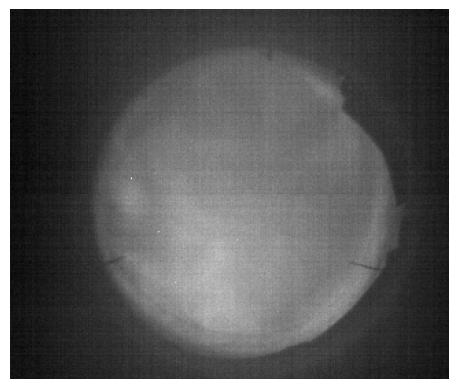

In [9]:
import matplotlib.pyplot as plt

plt.imshow(im_scaled[:, :, 0], origin="lower", cmap="gray")
plt.axis("off")
plt.show()

In [10]:
plt.style.use("dark_background")

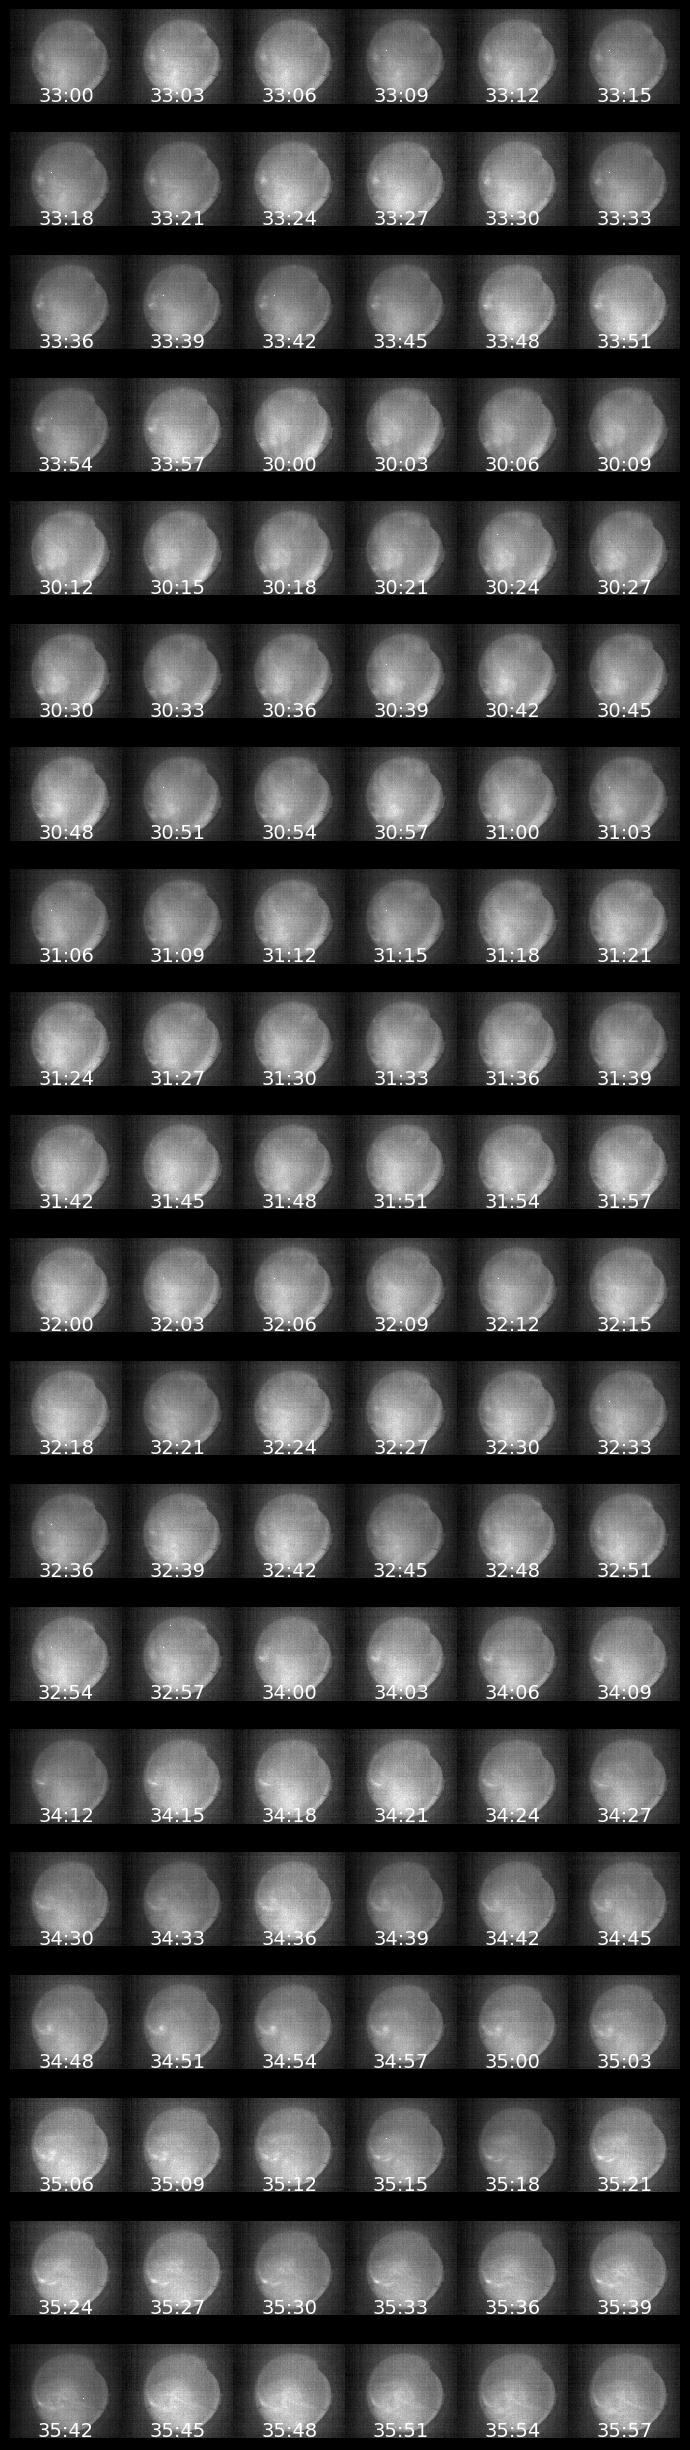

In [11]:
rows = 20
cols = 6
figsize = (7, 25)
timestamps_format = "%M:%S"
timestamps_fontsize = 14
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)